In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip gdrive/My\ \Drive/infosys/creditcardfraud.zip -d gdrive/My\ \Drive/infosys/

In [0]:
y!ls

In [0]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [0]:
data=pd.read_csv("gdrive/My Drive/infosys/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
!nvidia-smi

Tue Oct 23 16:54:31 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
"""Checking the class distribution"""

data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

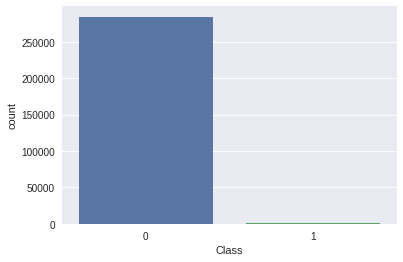

In [7]:
sns.countplot("Class",data=data)

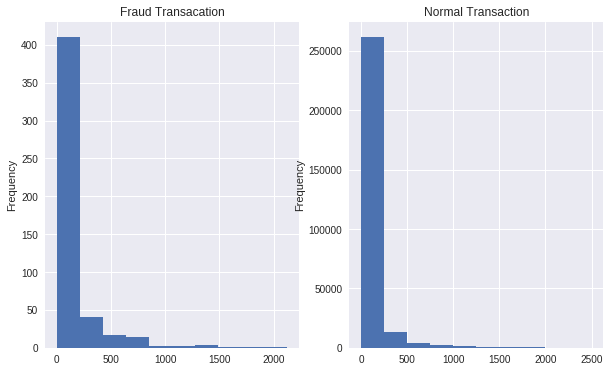

In [8]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

**Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
So the appraoach we are going to opt is to divide the majority calss in many parts and append oversampled minority class with it and then tran themodel on every mini batch 
then 
**



In [0]:
i=0
d={}
for x in range(1,143):
  d["{0}".format(x)]=split1=Normal_transacation.iloc[i:i+2000,:]
  i +=2000

In [0]:
fraud=Fraud_transacation.iloc[0:300,:]
f={}
for x in range(1,140):
  c = [d["{0}".format(x)],fraud]
  f["{0}".format(x)]= pd.concat(c)
  f["{0}".format(x)] = f["{0}".format(x)].sample(frac=1).reset_index(drop=True)

In [0]:
x_split={}
y_split={}
for x in range(1,140):
  y_split["{0}".format(x)]=f["{0}".format(x)]["Class"]
  x_split["{0}".format(x)]= f["{0}".format(x)].drop(["Class"],axis=1)

In [43]:
!pip install imblearn

I am thinking to segregate the data into different clusters and then analysing cluster properties -> fraud transactions cluster in a separate cluster.
The approach I am going to to experiment with are:
1. SMOTE data genration
2. Droping least important features and genetrate new hand coded features (creating 2D 3D 4D fatures using the most important features)

New dimensions can also throw data in separate space and then Boosting models can be implemented very easily.

In [0]:
from imblearn.over_sampling import SMOTE



In [0]:
"""Converting data frame to numpy array to apply SMOTE"""
x_array={}
y_array={}
for x in range(1,140):
  x_array["{0}".format(x)]=x_split["{0}".format(x)].values
  y_array["{0}".format(x)]=y_split["{0}".format(x)].values


In [175]:
y_array["1"].shape

(2300,)

In [0]:
x_smote_array={}
y_smote_array={}
for x in range(1,140):
  sm = SMOTE(random_state=(x+20))
  x_smote_array["{0}".format(x)], y_smote_array["{0}".format(x)] = sm.fit_resample(x_array["{0}".format(x)],y_array["{0}".format(x)])

In [177]:
x_smote_array["1"].shape
y_smote_array["1"].shape

(4000,)

In [0]:
"""Converting numpy array back to pandas data frame"""
x_smote_df={}
y_smote_df={}
for x in range(1,140):
  x_smote_df["{0}".format(x)] = pd.DataFrame(x_smote_array["{0}".format(x)])
  y_smote_df["{0}".format(x)] = pd.DataFrame(y_smote_array["{0}".format(x)])
  x_smote_df["{0}".format(x)] = x_smote_df["{0}".format(x)].sample(frac=1).reset_index(drop=True)
  y_smote_df["{0}".format(x)] = y_smote_df["{0}".format(x)].sample(frac=1).reset_index(drop=True)

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [180]:
cnf_matrix = confusion_matrix(x_labels_test, predictions)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

NameError: ignored

In [0]:
X_s[30] = pd.DataFrame(X_res[:,4]*X_res[:,14])
X_s[31] = pd.DataFrame(X_res[:,0]*X_res[:,12])
X_s[32] = pd.DataFrame(X_res[:,4]*X_res[:,14]*X_res[:,12])
X_s[33] = pd.DataFrame(X_res[:,0]*X_res[:,12]*X_res[:,4])
X_s[34] = pd.DataFrame(X_res[:,0]*X_res[:,17])
X_s[35] = pd.DataFrame(X_res[:,4]*X_res[:,17]*X_res[:,14])

In [0]:
x_features_train1,x_features_test1,x_labels_train1,x_labels_test1 =  train_test_split(X_s,Y_s,test_size=0.1)

In [0]:
import xgboost as xgb

In [0]:
xg ={}
for i in range(1,3):
  xg["{0}".format(i)] = xgb.XGBClassifier(max_depth=5, n_estimators=350, learning_rate=0.02).fit(x_smote_df["{0}".format(i)],y_smote_df["{0}".format(i)])

In [0]:
fraud_test=Fraud_transacation.iloc[301:492,:]
c = [d["141"],d["142"],fraud_test]
f_test= pd.concat(c)
f_test = f_test.sample(frac=1).reset_index(drop=True)


In [0]:
f_test_features=f_test.drop(["Class"],axis=1)
col=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
f_test_features.columns=col
f_test_label=f_test["Class"]

In [0]:

prediction0=xg["1"].predict(f_test_features)
prediction1=xg["2"].predict(f_test_features)

In [253]:
np.count_nonzero(prediction1)

2083

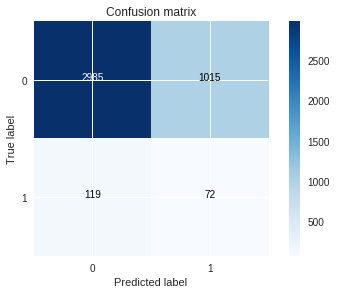

In [265]:
cnf_matrix = confusion_matrix(f_test_label,prediction0)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

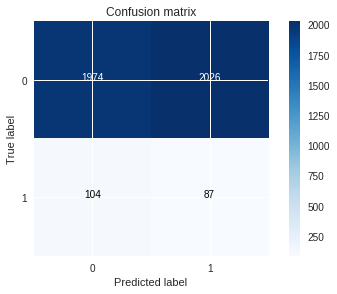

In [266]:
cnf_matrix = confusion_matrix(f_test_label,prediction1)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# New Section

In [0]:
import pickle
pickle.dump(xgb_feature, open("pima.pickle.dat", "wb"))

In [0]:
from sklearn.externals import joblib
joblib.dump(xgb_feature, "joblib.sav")

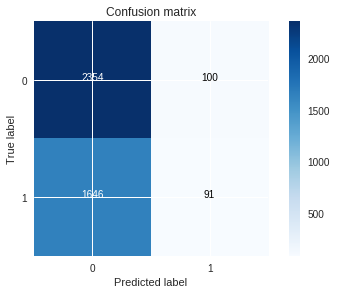

In [0]:
features =list(X_s.columns.values)
features_str = [str(item) for item in features]
X_s.columns=[features_str]
X_s['LABEL']=Y_s
X_s.head()

In [0]:
import tensorflow as tf

In [0]:
def make_train_input_fn(dfx, num_epochs):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = df[LABEL],
    batch_size = 128,
    num_epochs = num_epochs,
    shuffle = True,
    queue_capacity = 1000
  )

In [0]:

def make_eval_input_fn(dfx,dfy):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = df[LABEL],
    batch_size = 128,
    shuffle = False,
    queue_capacity = 1000
  )

In [0]:
def make_prediction_input_fn(df):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = None,
    batch_size = 128,
    shuffle = False,
    queue_capacity = 1000
  )

In [0]:
COLUMNS= ['1','2','3','4','5']

In [0]:
FEATURES = COLUMNS[0:len(COLUMNS)]
print(FEATURES)

In [0]:
def make_feature_cols():
  input_columns = [tf.feature_column.re(k) for k in FEATURES]
  return input_columns

In [0]:
import shutil

In [0]:
tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = 'trained'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

model = tf.estimator.LinearRegressor(
      feature_columns = make_feature_cols(), model_dir = OUTDIR)

model.train(input_fn = make_train_input_fn(X_s.head(),Y_s.head(), num_epochs = 10))